## Importing The Necessary Projects


In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

## Data Wrangling

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [14]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

## Selecting The Features And Target Variables

In [25]:
X = df.drop('Profit', axis=1).copy()

In [26]:
y = df[['Profit']].copy()

## Encoding Columns With Categorical Variables Using Pandas

In [41]:
X = pd.get_dummies(X, columns=['State'])

In [43]:
# X

# EXPLORATION DATA ANALYSIS

In [32]:
cols = ['R&D Spend', 'Administration', 'Marketing Spend']

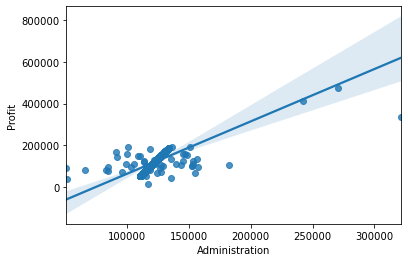

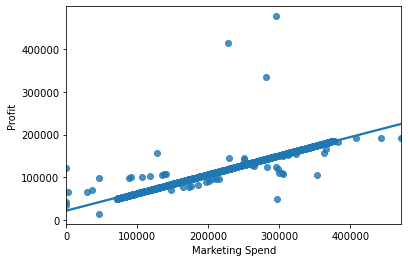

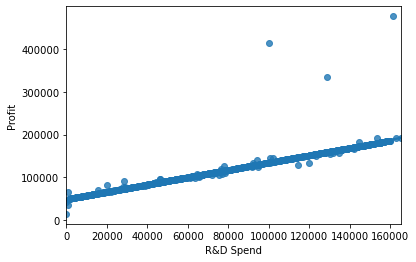

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

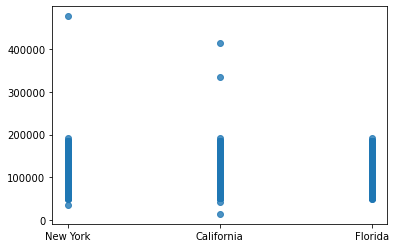

In [40]:
# for data in X[cols]:
sns.regplot(x=X['Administration'], y=y)
plt.show()

sns.regplot(x=X['Marketing Spend'], y=y)
plt.show()

sns.regplot(x=X['R&D Spend'], y=y)
plt.show()


sns.regplot(x=X['State'], y=y)
plt.show()

# Normalizing the input so it can give accurate result 

In [44]:
sc = StandardScaler()

In [45]:
X = sc.fit_transform(X)

## Splitting The Data Into Training And Testing Set

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=41)

In [180]:
X_train.shape, X_test.shape

((750, 6), (250, 6))

# Building Our Model Using The Xgboost Regression Algorithm

In [181]:
xgb = XGBRegressor()

In [182]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Model Evaluation

In [183]:
xgb_predict = xgb.predict(X_test)

In [184]:
r2_score(xgb_predict, y_test)

0.9718595061863363

In [185]:
mean_squared_error(xgb_predict, y_test)

54842580.74505921

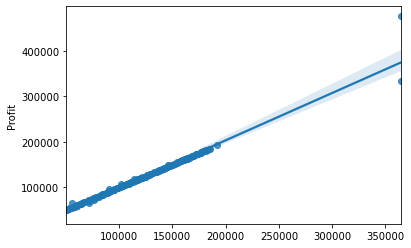

In [186]:
sns.regplot(x=xgb_predict, y=y_test)
plt.show()

In [187]:
t_xgb_predict = xgb.predict(X_train) 

In [188]:
r2_score(t_xgb_predict, y_train)

0.9999952611103

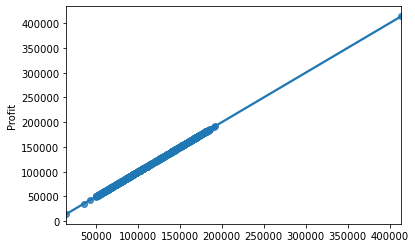

In [189]:
sns.regplot(x=t_xgb_predict, y=y_train)
plt.show()

# Saving the Model into a .pkl file

In [190]:
joblib.dump(regressor, 'Business-profit-prediction-Model.pkl')

['Business-profit-prediction-Model.pkl']

In [191]:
joblib.load('Business-profit-prediction-Model.pkl')

LinearRegression()